In [1]:
# Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a dataframe
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
# Train/Test split
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% of the data reserved for the test set
    random_state=412,   # Fix the random seed for reproducibility
)

Best k: 2
Train labels: [0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 0 0]
Test labels: [1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1]


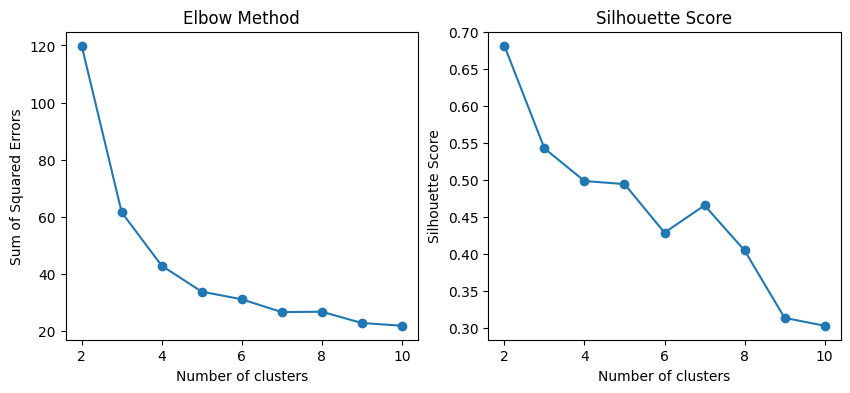

In [ ]:
# Find the best number of clusters for KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

K_range = range(2, 11)  # From 2 to 10 for clusters
sse = []                # Sum of Squared Errors
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=412)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

best_k = K_range[np.argmax(silhouette_scores)]
print("Best k:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=412)
kmeans.fit(X_train)

train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test)
print("Train labels:", train_labels)
print("Test labels:", test_labels)


# Visualize the results
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()